# Analyze words in EJMR

### References
* word frequency: https://stackoverflow.com/questions/40206249/count-of-most-popular-words-in-a-pandas-dataframe

In [39]:
import os
import pandas as pd
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np

%matplotlib inline

In [2]:
print os.getcwd()

/Users/palermospenano/Desktop/github_proj/ejmr_analysis


In [3]:
ejmr_df = pd.read_csv('./ejmr_data/ejmr_data_cleand.csv')

In [4]:
len(ejmr_df)

286116

## Word frequency

In [5]:
# remove commas from cleanTitle
ejmr_df['cleanTitle'] = ejmr_df['cleanTitle'].str.replace(',', '') 

#### word frequency: all thread titles
* to try: tokenize with 2 or 3 words

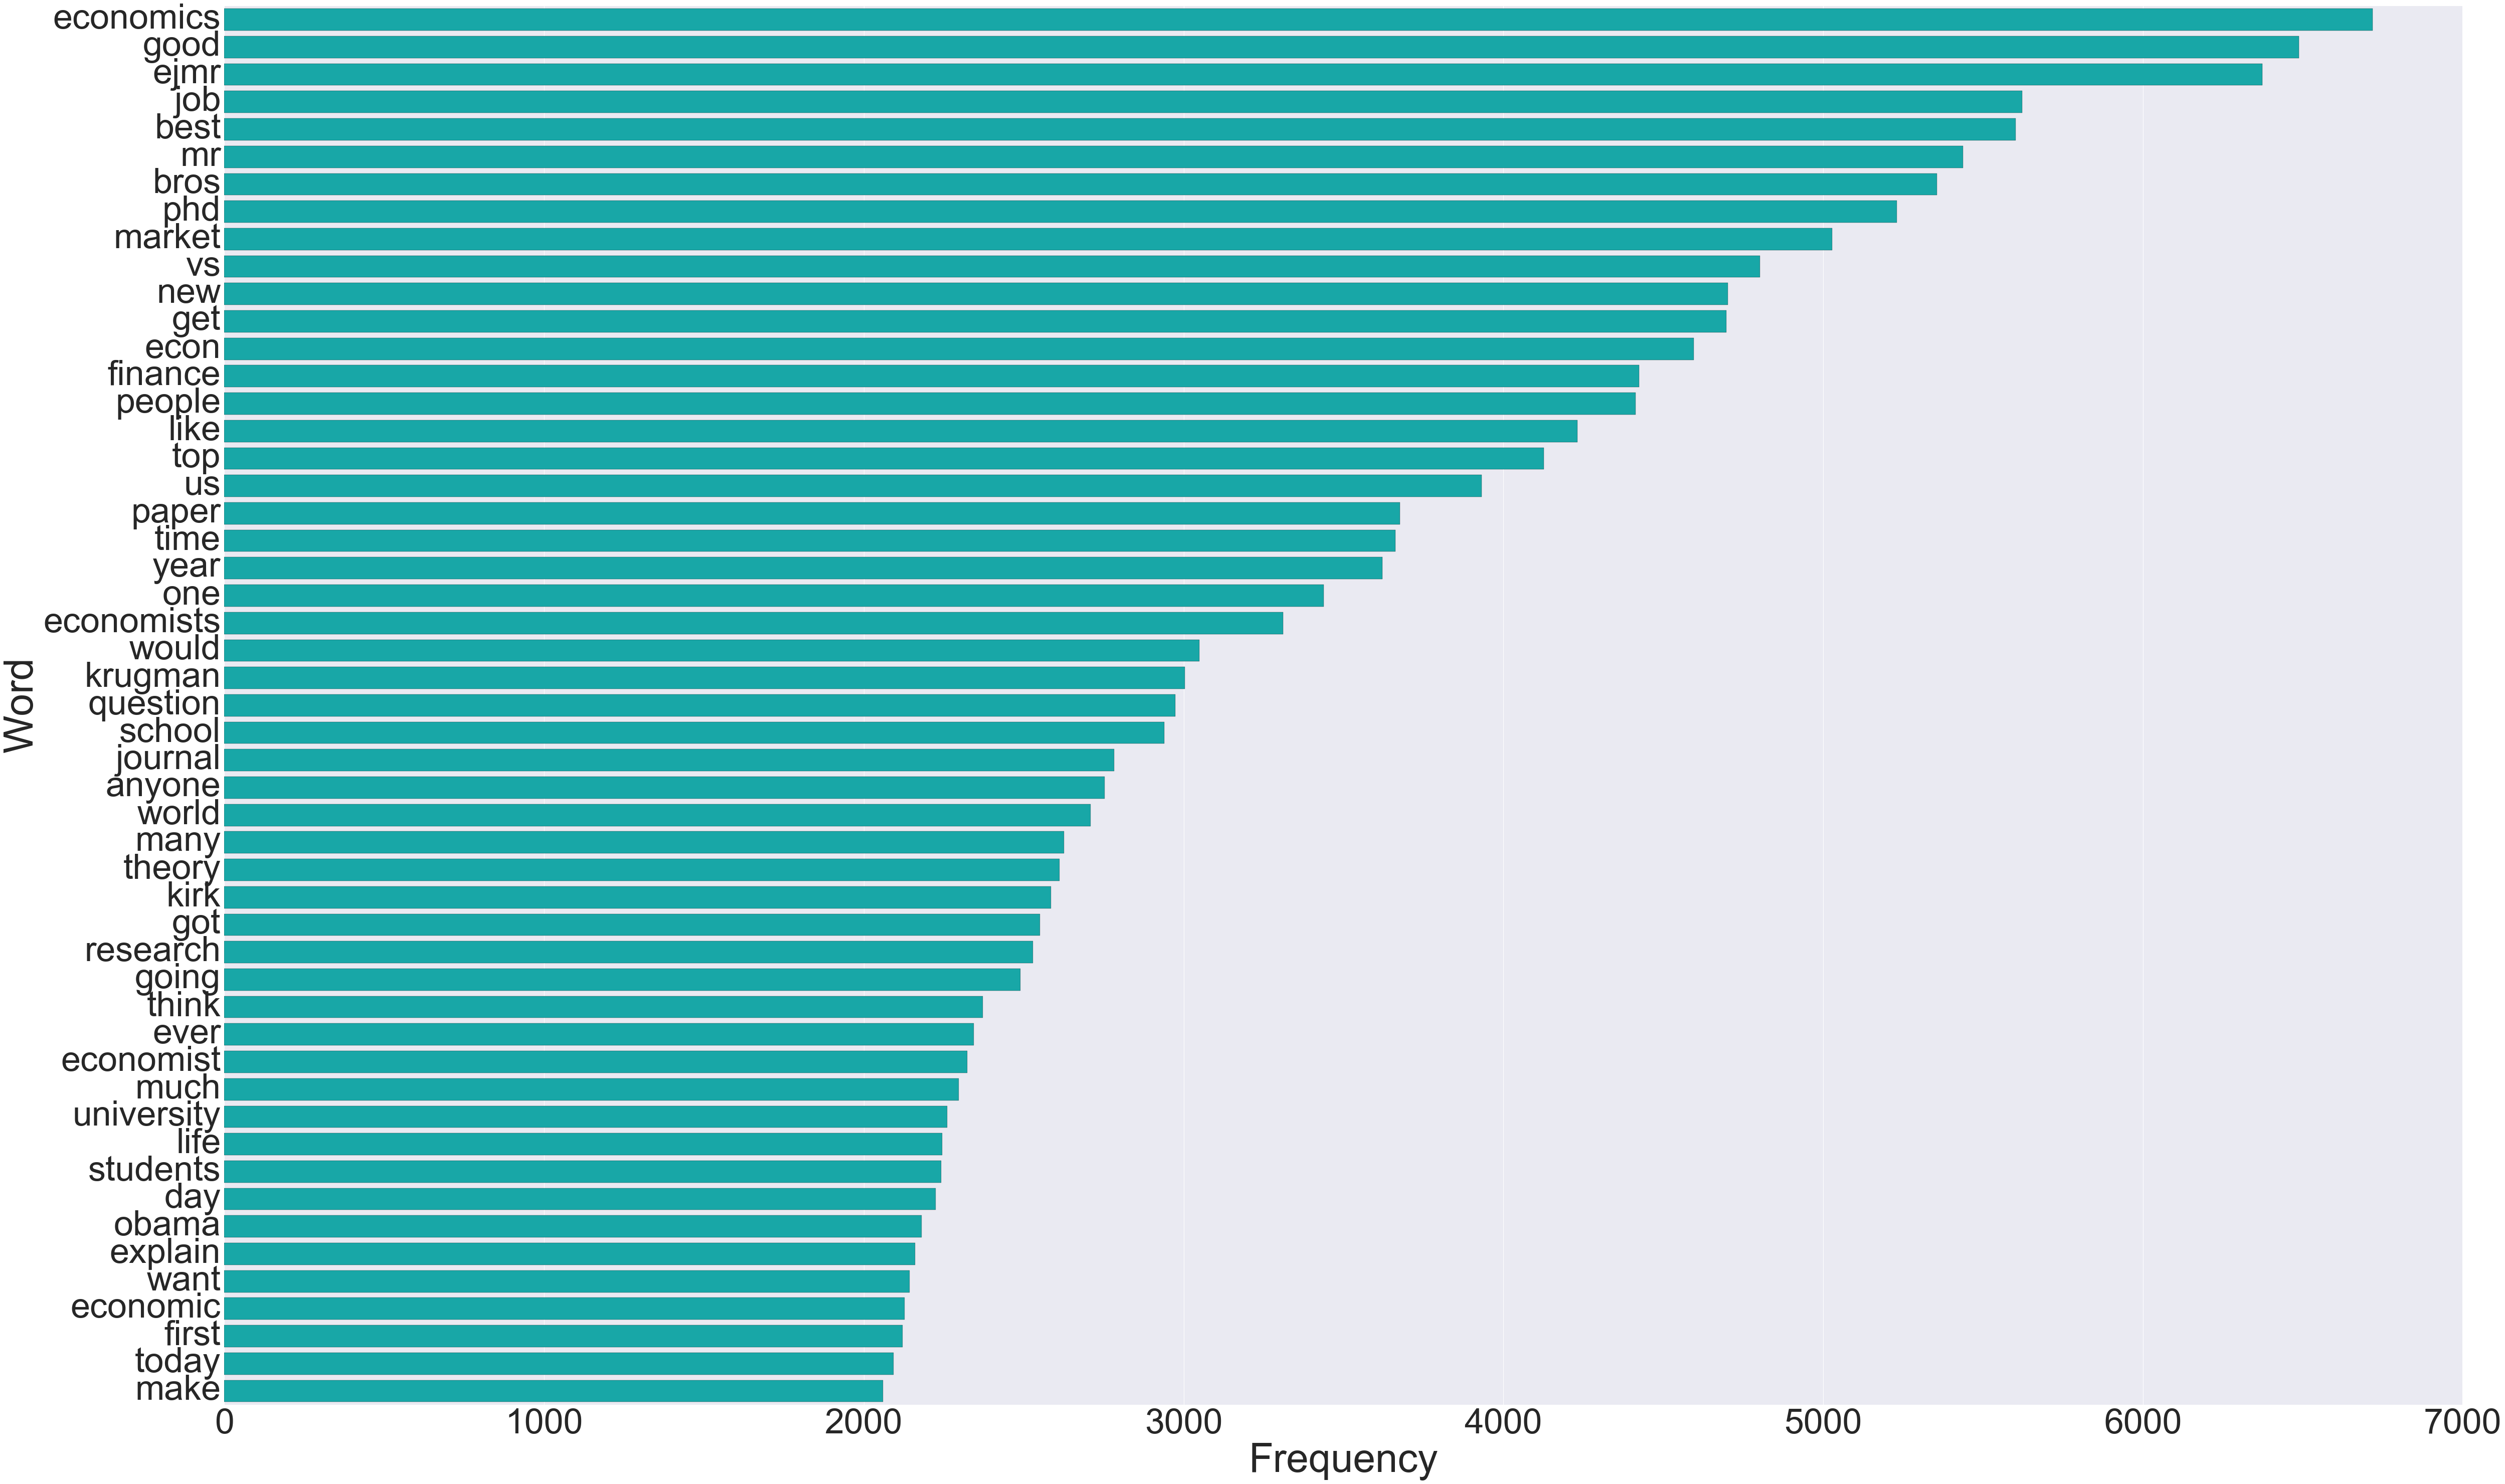

In [6]:
# concatenate all rows in the cleanTitle column into one line
txt = ejmr_df['cleanTitle'].str.cat(sep=' ')

# tokenize the entire line
words = nltk.tokenize.word_tokenize(txt)

# get frequency of each word, save the top top_N in a dataframe
word_dist = nltk.FreqDist(words)

top_N = 51
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(80, 50))

ax = sns.barplot(y="Word", x="Frequency", data=rslt, color="c")
ax.set_xlabel("Frequency", fontsize=80)
ax.set_ylabel("Word", fontsize=80)
ax.tick_params(labelsize=70)

#### word frequency by view count and number of posts

In [152]:
# get some percentiles of the views and num_posts variables 
ejmr_df[['views', 'num_posts']].quantile([.01,.05,.10,.25,.5,.75,.9,.95,.99])

,views,num_posts
0.01,49.00,1.0
0.05,104.00,1.0
0.10,142.00,1.0
0.25,223.00,3.0
0.50,368.00,6.0
0.75,692.00,12.0
0.90,1479.00,23.0
0.95,2575.00,33.0
0.99,6838.85,66.0


Word frequency for thread titles with views above the 90th percentile

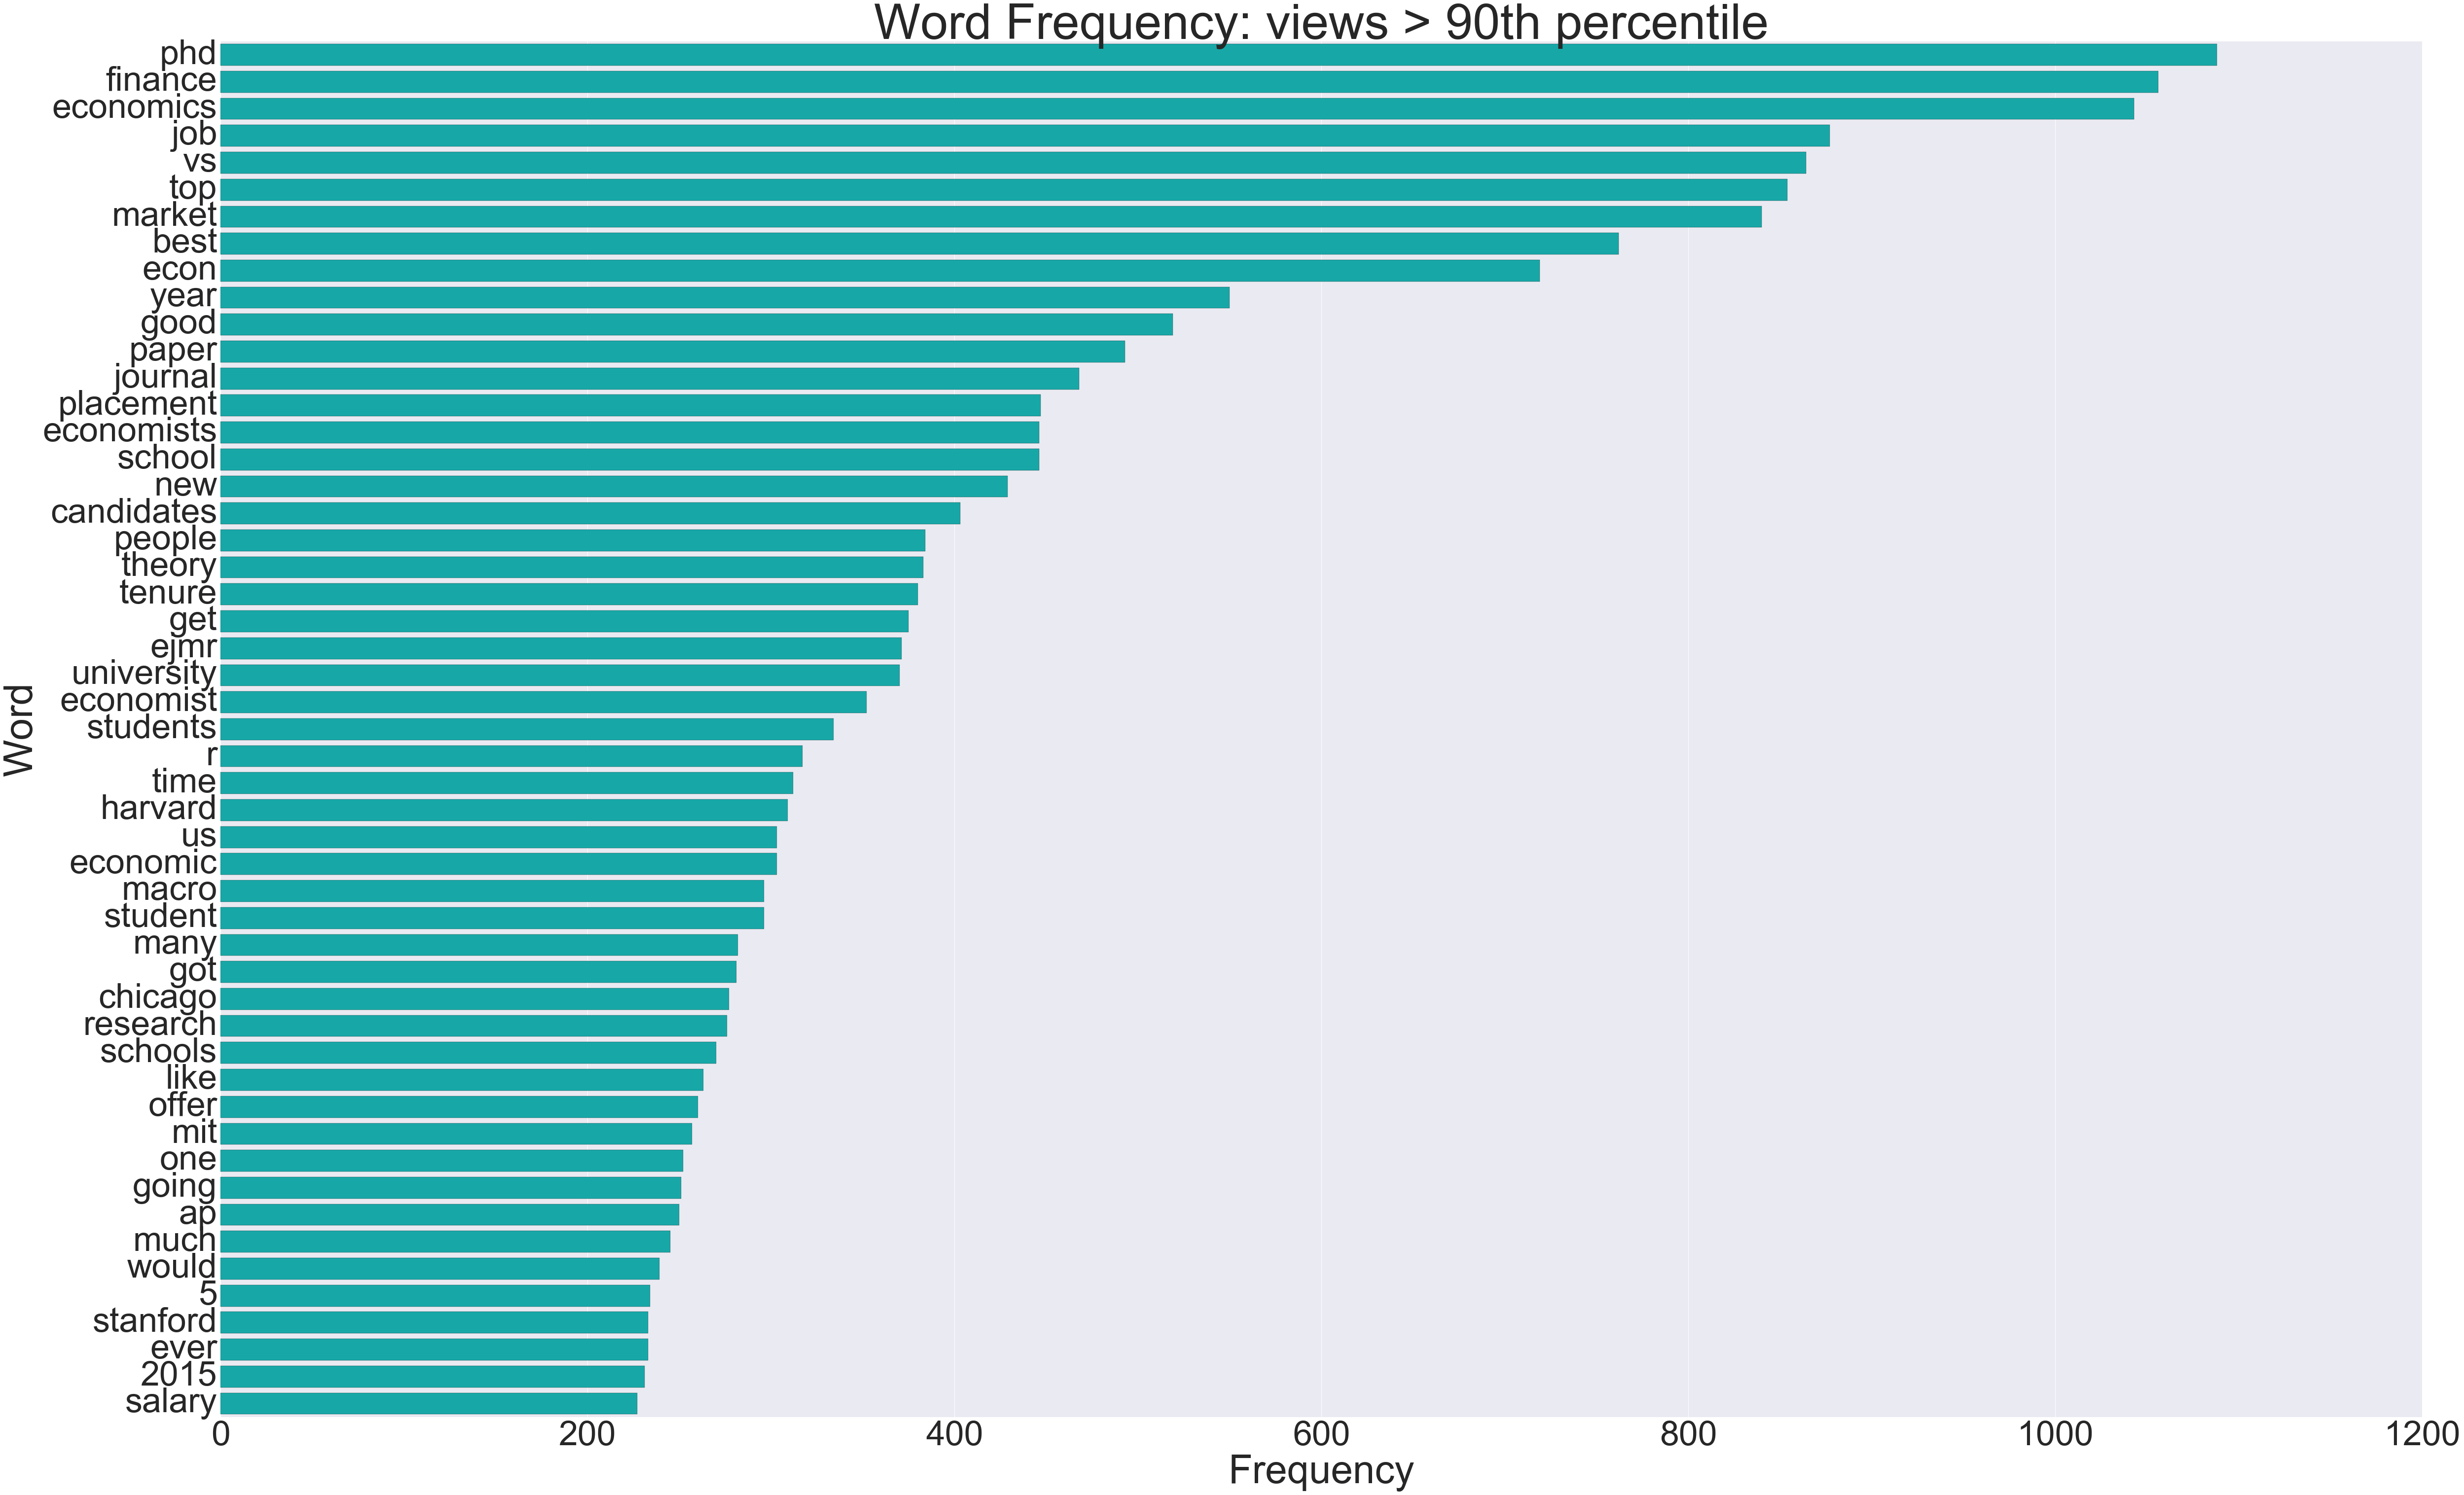

In [171]:
ejmr_df_topv = ejmr_df.loc[ejmr_df['views'] > 1479]

txt = ejmr_df_topv['cleanTitle'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

top_N = 51
rslt_topv = pd.DataFrame(word_dist.most_common(top_N),
                         columns=['Word', 'Frequency'])

plt.figure(figsize=(80, 50))
ax = sns.barplot(y="Word", x="Frequency", data=rslt_topv, color="c")
ax.set_title('Word Frequency: views > 90th percentile', fontsize=100)
ax.set_xlabel("Frequency", fontsize=80)
ax.set_ylabel("Word", fontsize=80)
ax.tick_params(labelsize=70)

plt.show()


Word frequency for thread titles below 25th percentile

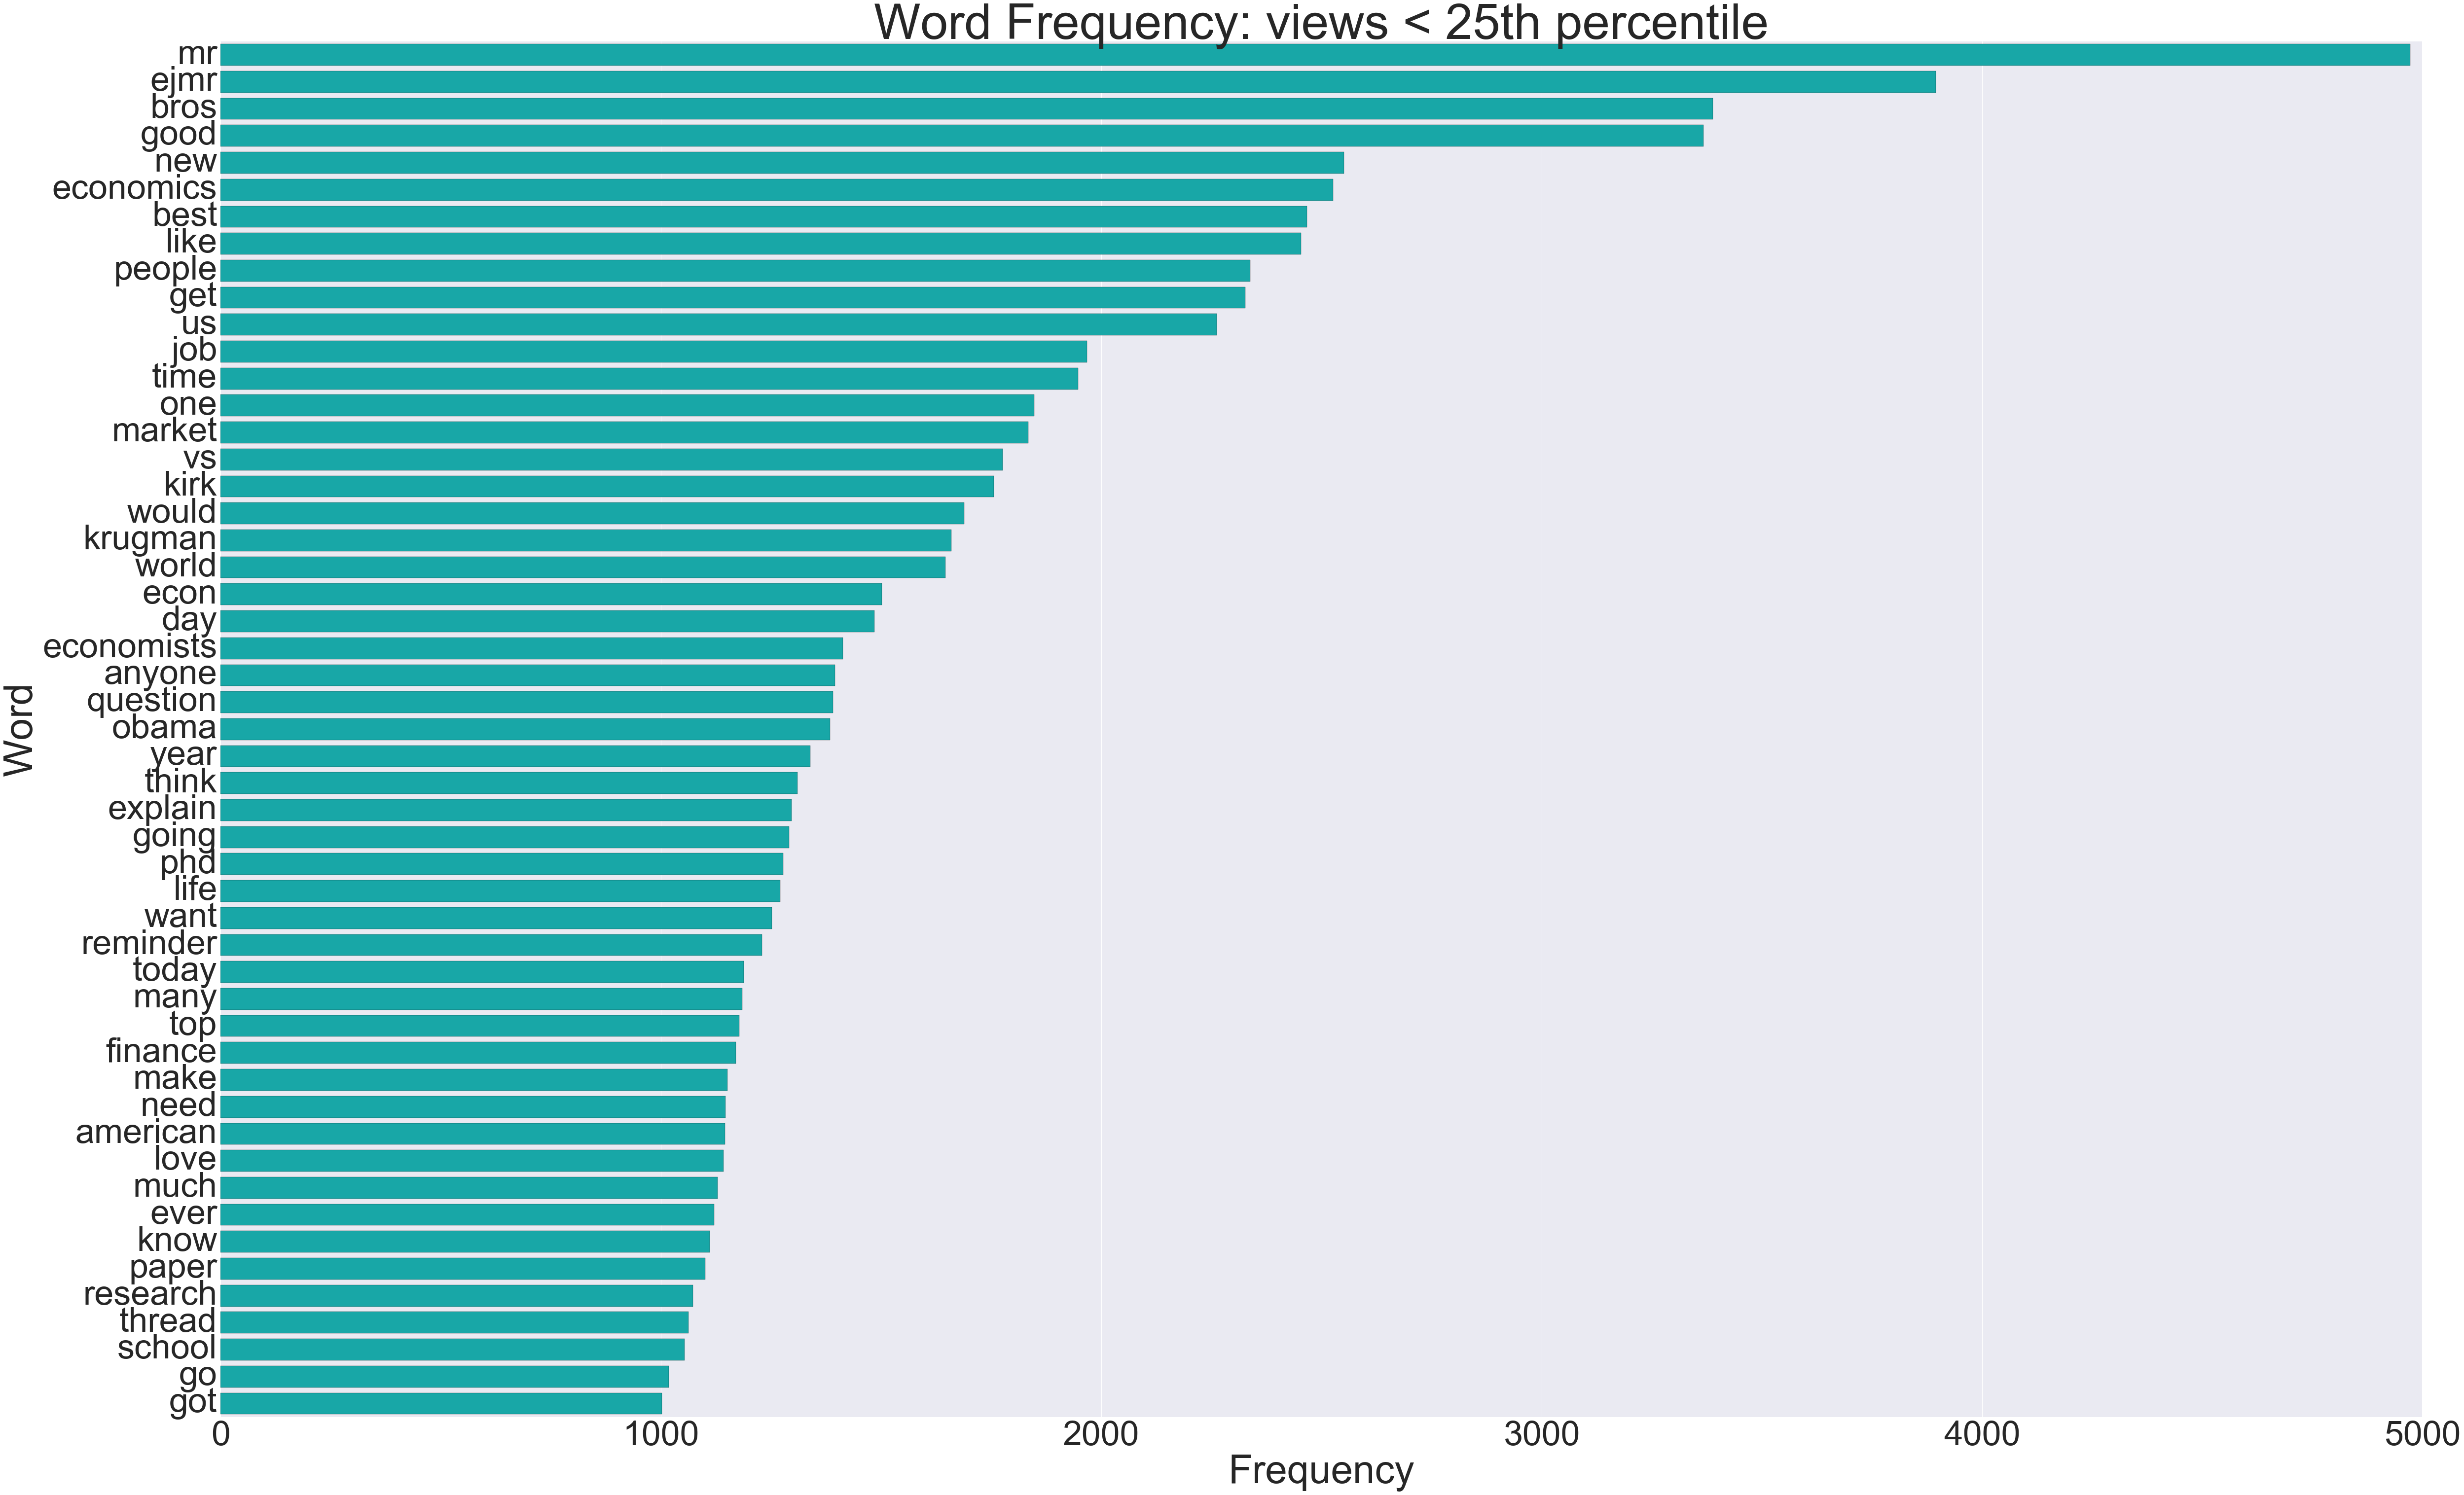

In [172]:
ejmr_df_bttmv = ejmr_df.loc[ejmr_df['views'] < 368]

txt = ejmr_df_bttmv['cleanTitle'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

top_N = 51
rslt_bttmv = pd.DataFrame(word_dist.most_common(top_N),
                         columns=['Word', 'Frequency'])

plt.figure(figsize=(80, 50))
ax = sns.barplot(y="Word", x="Frequency", data=rslt_bttmv, color="c")
ax.set_title('Word Frequency: views < 25th percentile', fontsize=100)
ax.set_xlabel("Frequency", fontsize=80)
ax.set_ylabel("Word", fontsize=80)
ax.tick_params(labelsize=70)

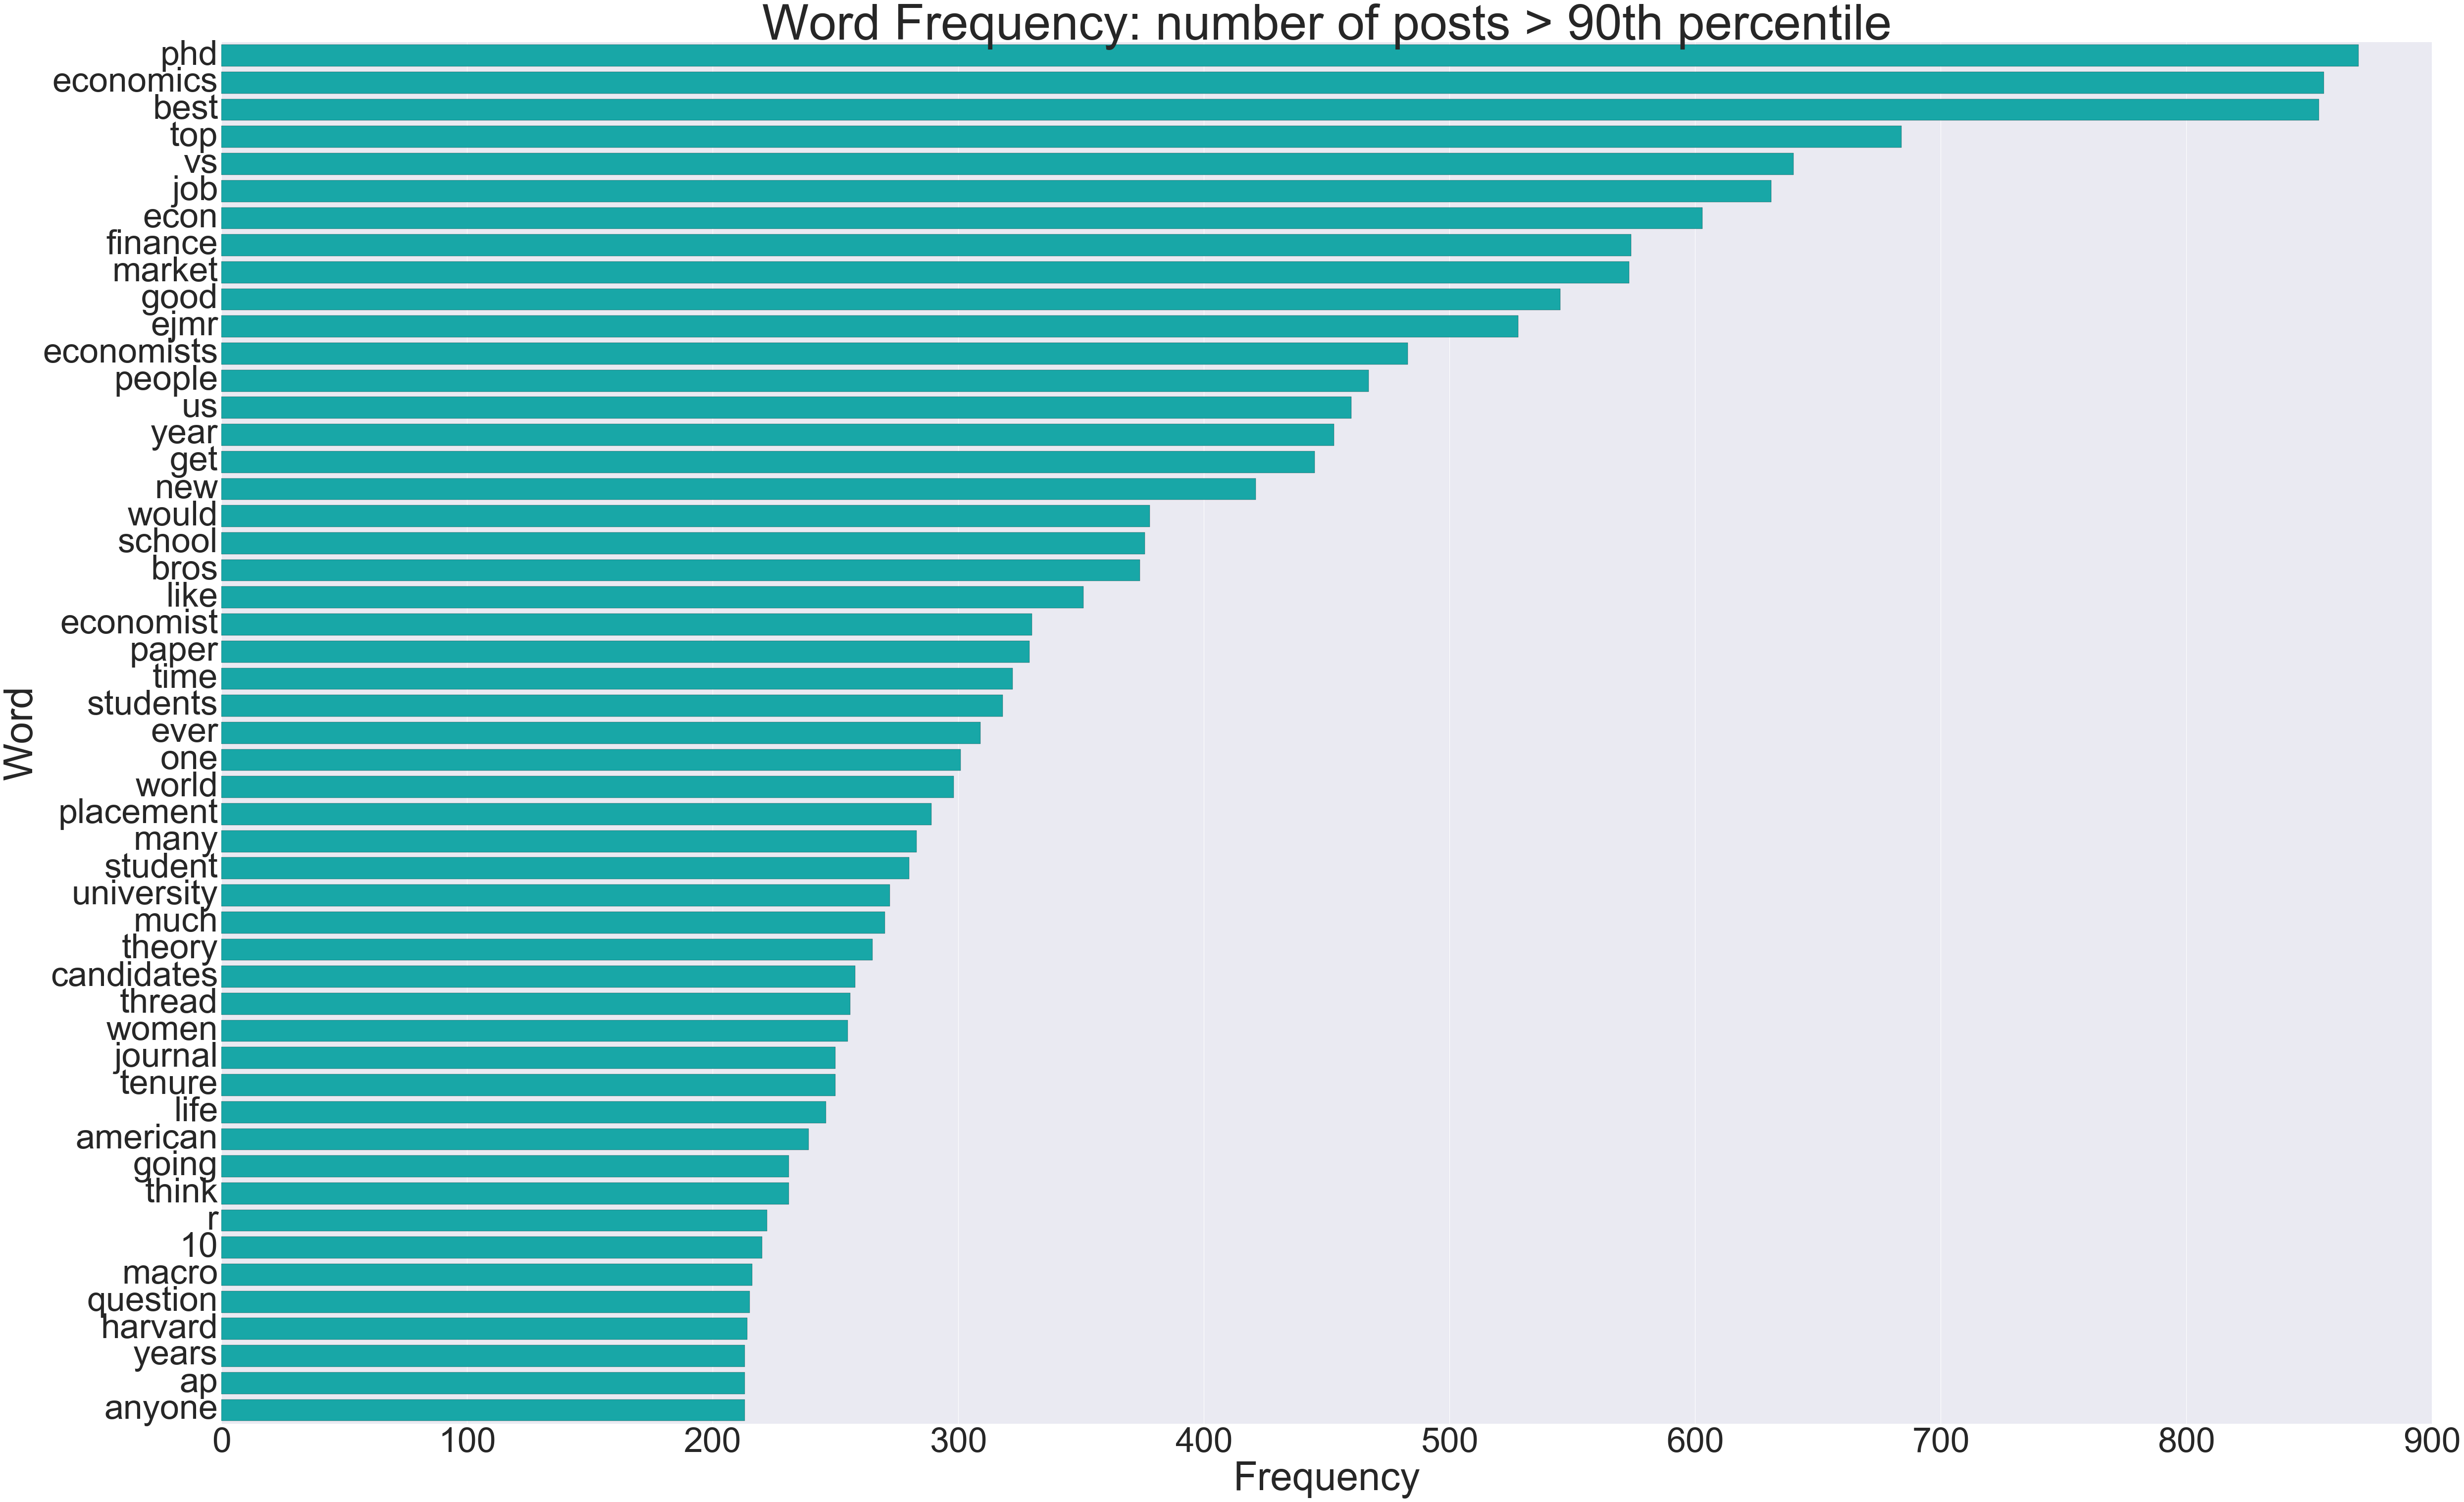

In [175]:
ejmr_df_topnp = ejmr_df.loc[ejmr_df['num_posts'] > 23]

txt = ejmr_df_topnp['cleanTitle'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

top_N = 51
rslt_topnp = pd.DataFrame(word_dist.most_common(top_N),
                         columns=['Word', 'Frequency'])

plt.figure(figsize=(80, 50))
ax = sns.barplot(y="Word", x="Frequency", data=rslt_topnp, color="c")
ax.set_title('Word Frequency: number of posts > 90th percentile', fontsize=100)
ax.set_xlabel("Frequency", fontsize=80)
ax.set_ylabel("Word", fontsize=80)
ax.tick_params(labelsize=70)

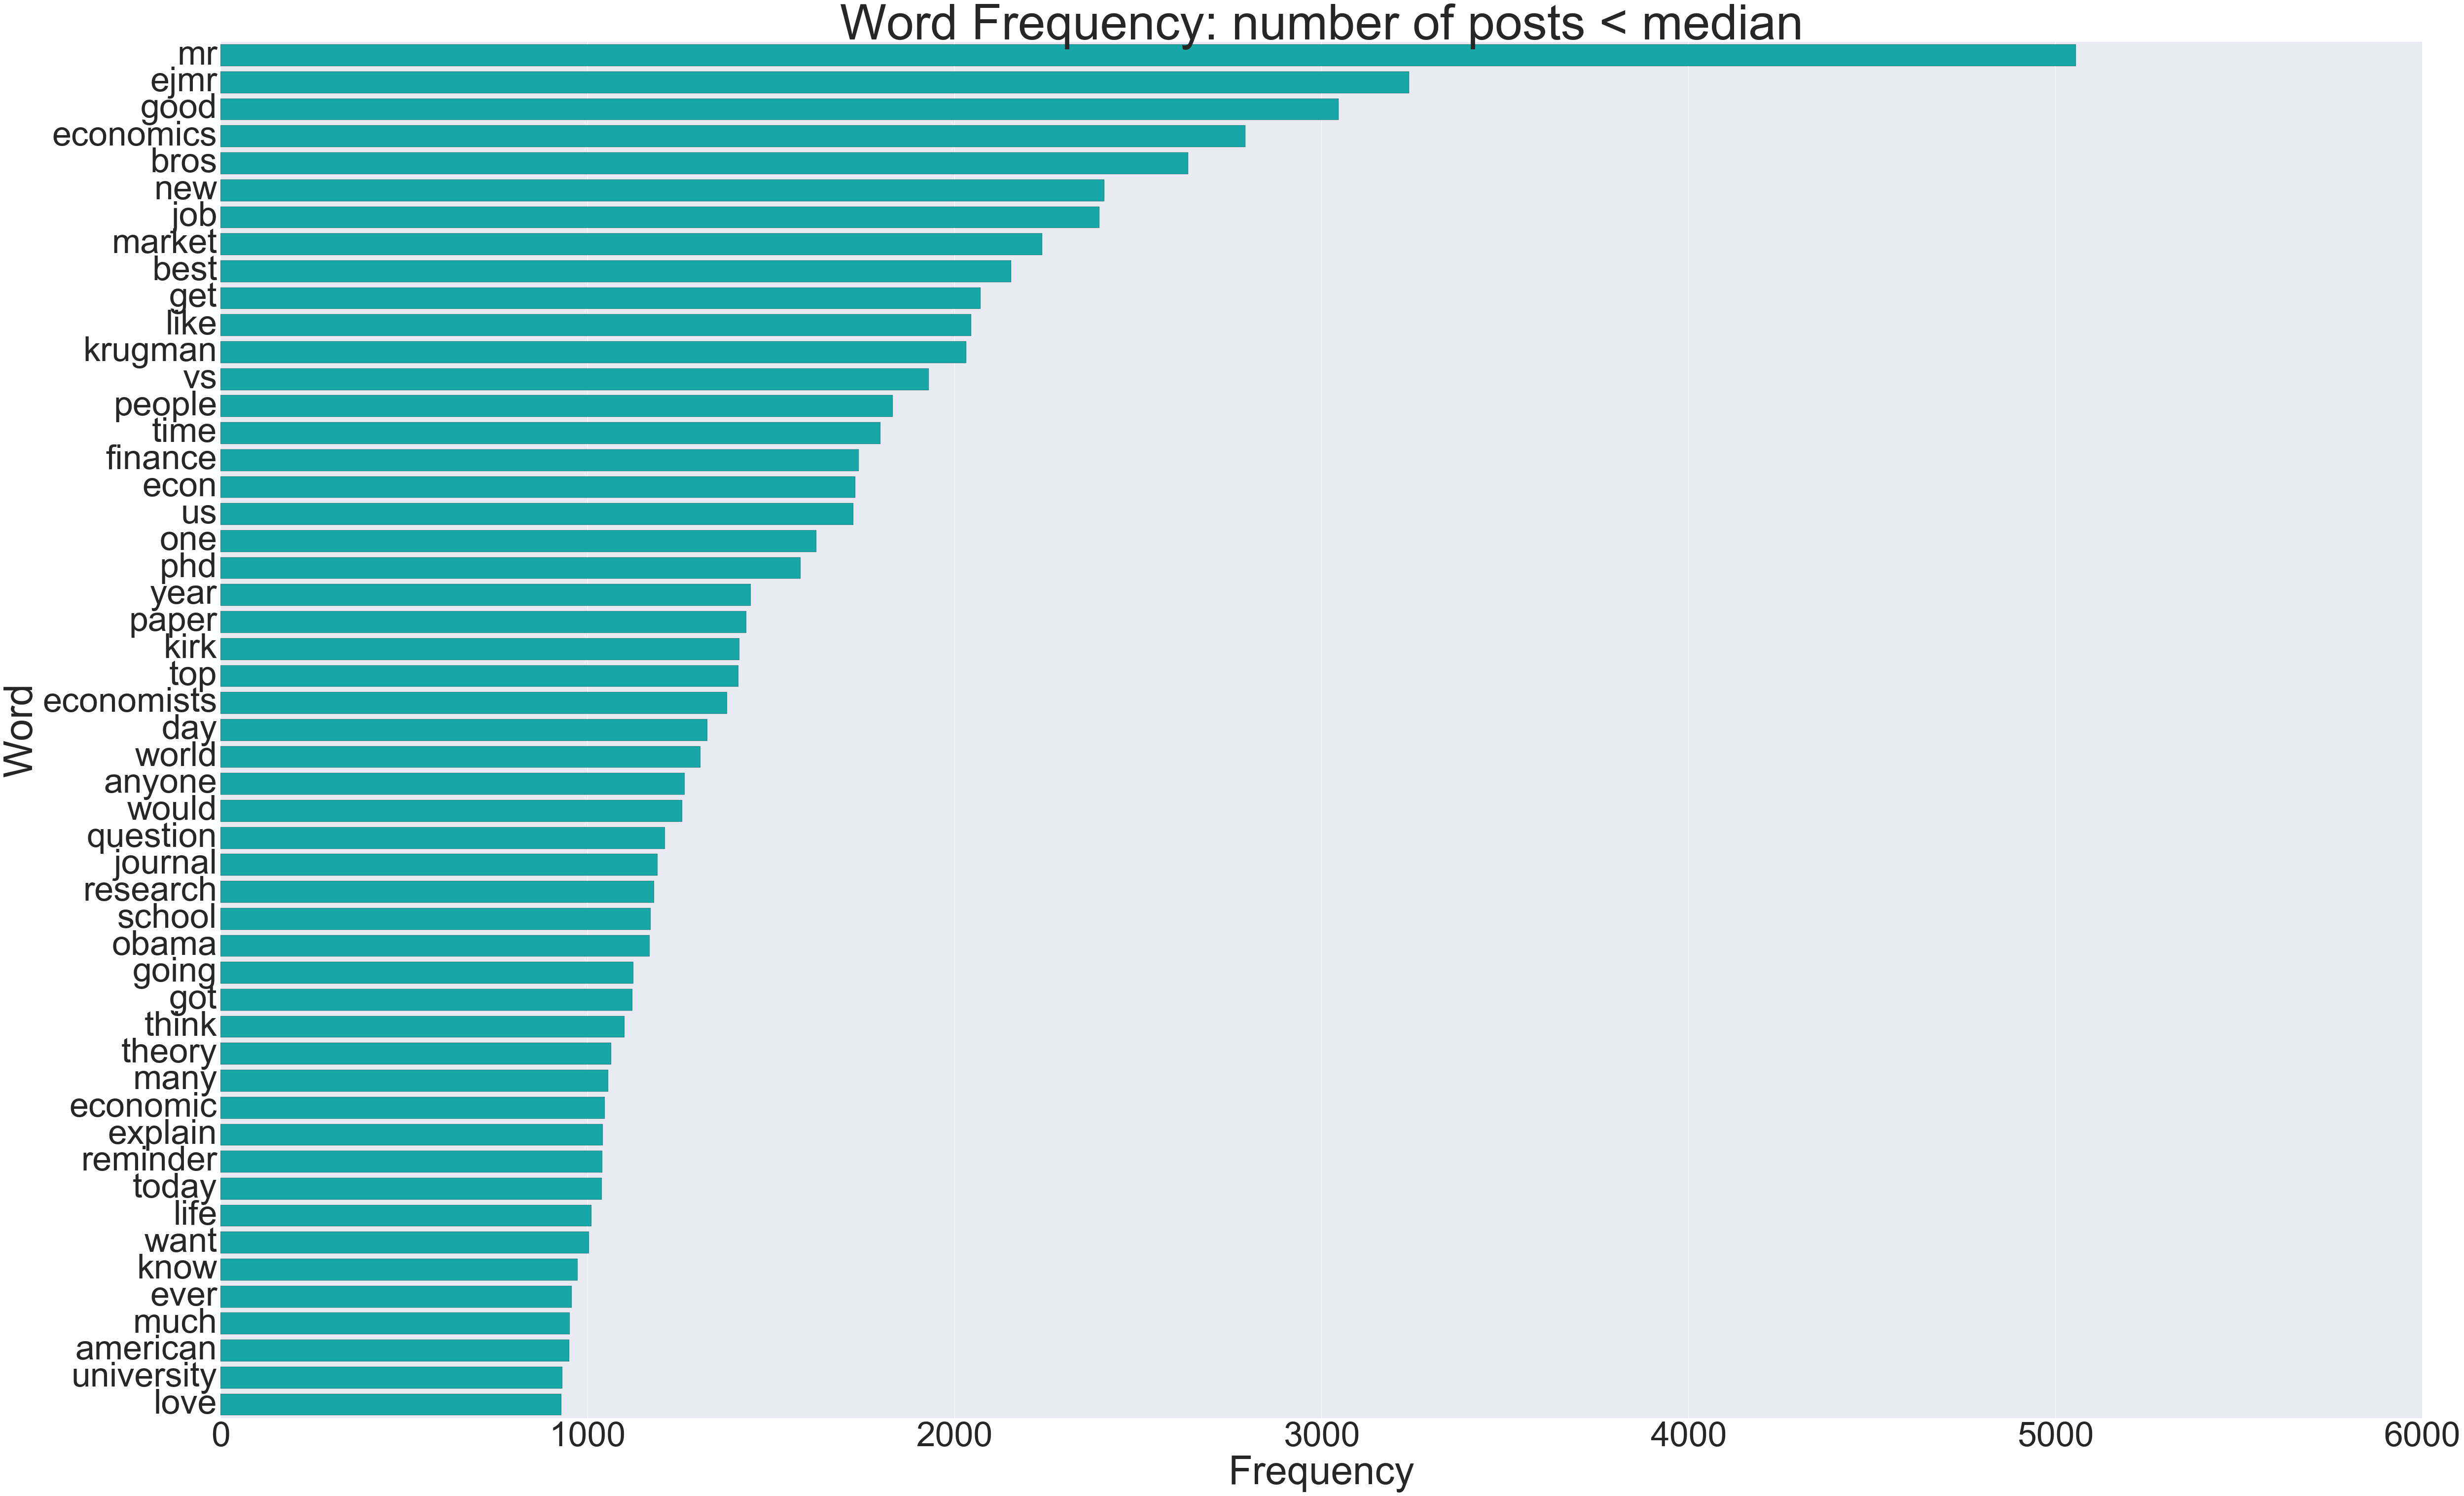

In [177]:
ejmr_df_bttmnp = ejmr_df.loc[ejmr_df['num_posts'] < 6]

txt = ejmr_df_bttmnp['cleanTitle'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

top_N = 51
rslt_bttmnp = pd.DataFrame(word_dist.most_common(top_N),
                         columns=['Word', 'Frequency'])

plt.figure(figsize=(80, 50))
ax = sns.barplot(y="Word", x="Frequency", data=rslt_bttmnp, color="c")
ax.set_title('Word Frequency: number of posts < median', fontsize=100)
ax.set_xlabel("Frequency", fontsize=80)
ax.set_ylabel("Word", fontsize=80)
ax.tick_params(labelsize=70)

## Top posts by views

In [23]:
# set column width so post_title is displayed in full
pd.set_option('display.max_colwidth', 150)

# set max row to display
pd.set_option('display.max_rows', 100)

In [24]:
list(ejmr_df.columns.values)

['pandas_index',
 'post_title',
 'num_posts',
 'views',
 'votes',
 'how_fresh',
 'download_time',
 'title',
 'post_link',
 'freshness',
 'cleanTitle',
 'job_related']

In [25]:
ejmr_topposts = ejmr_df[['post_title', 'views', 'how_fresh', 'download_time']].sort_values(by='views', ascending=False).head(n=20)

In [26]:
ejmr_topposts.head(n=21)

,post_title,views,how_fresh,download_time
129095,Chinese job market 2010-2011,872123,2 years,2017-06-11 05:33:28.165780
160527,China job market 2011-2012,559696,3 months,2017-06-11 03:44:51.932838
15744,World Bank Group - Analyst Programme 2015,364248,10 months,2017-06-11 04:01:43.145967
65339,"New ""Family Ruptures"" AER / NBER is rip-off of obscure paper",347957,4 days,2017-06-11 03:37:32.525397
146673,Seasoned AP market in Finance,271454,3 months,2017-06-11 03:44:17.733775
231080,Turkish Market?,241792,22 hours,2017-06-11 03:37:20.802266
3307,Thread for GTFO's questions about PhD rankings and admissions,218531,7 months,2017-06-11 03:55:51.903715
26912,Marketing Job Market 2016,201324,1 year,2017-06-11 04:07:21.995516
3956,how to reply to a request of scheduling an interview,180824,7 months,2017-06-11 03:56:08.557175
20935,Bruno Frey,175533,11 months,2017-06-11 04:04:25.581508


As expected, top threads by view counts on EJMR is dominated by posts related to the economics job market. Let's see what are some of the top posts that are not related to discussion about job market outcomes. I filter the thread titles by common group of words related to the job market. The drawback of this approach is it will filter out all thread titles, for example, with "job market" in it that are not necessarily related to the economic job market (e.g. "effect of policy X on university graduate's job market in Canada". The approach also excludes job market outcome discussion that are not in the list of group of words used for exclusion.

### job market vs non-job market related top posts

In [27]:
def jobRelated(string, job_words):
    """
    returns 1 if string contain any of the group of words in job_words
    """
    return 1 if any(x.lower() in string for x in job_words) else 0

job_words = ['job market',
             'ap market',
             'analyst programme',
             'world bank ypp',
             'accounting market',
             'world bank group',
             'ypp',
             'canadian offers',
             'turkish market',
             'Ag econ market',
             'OECD Young Professionals',
             'AFA interviews',
             'ECB Graduate Programme',
             'Chinese Market'
            ]

ejmr_df['job_related'] = ejmr_df['cleanTitle'].apply(lambda x: jobRelated(str(x), job_words))

In [31]:
# dataframes containing top posts that are job market related and non-job market related
head_num = 30
ejmr_topposts_jm = ejmr_df[['post_title', 'views', 'num_posts', 'how_fresh', 'download_time', 'post_link']][ejmr_df['job_related'] == 1].sort_values(by='views', ascending=False).head(n=head_num)
ejmr_topposts_njm = ejmr_df[['post_title', 'views', 'num_posts', 'how_fresh', 'download_time', 'post_link']][ejmr_df['job_related'] == 0].sort_values(by='views', ascending=False).head(n=head_num)

#### top job market related posts

In [32]:
# display clickable link to original thread
ejmr_topposts_jm['post_link'] = ejmr_topposts_jm['post_link'].apply(lambda x: '<a href="{0}">link to thread</a>'.format(x))
HTML(ejmr_topposts_jm.to_html(escape=False))

,post_title,views,num_posts,how_fresh,download_time,post_link
129095,Chinese job market 2010-2011,872123,2110,2 years,2017-06-11 05:33:28.165780,link to thread
160527,China job market 2011-2012,559696,3504,3 months,2017-06-11 03:44:51.932838,link to thread
15744,World Bank Group - Analyst Programme 2015,364248,3301,10 months,2017-06-11 04:01:43.145967,link to thread
146673,Seasoned AP market in Finance,271454,1726,3 months,2017-06-11 03:44:17.733775,link to thread
231080,Turkish Market?,241792,1795,22 hours,2017-06-11 03:37:20.802266,link to thread
26912,Marketing Job Market 2016,201324,1739,1 year,2017-06-11 04:07:21.995516,link to thread
126235,Marketing Job Market 2017,171989,1437,2 months,2017-06-11 03:43:28.263986,link to thread
61130,World Bank YPP 2015,130608,959,1 year,2017-06-11 04:25:09.018938,link to thread
272442,World Bank YPP 2011,129016,547,5 years,2017-06-11 08:10:39.705754,link to thread
176989,Accounting market,127752,1962,1 week,2017-06-11 03:37:49.071275,link to thread


#### top non-job market related posts

In [33]:
ejmr_topposts_njm['post_link'] = ejmr_topposts_njm['post_link'].apply(lambda x: '<a href="{0}">link to thread</a>'.format(x))
HTML(ejmr_topposts_njm.to_html(escape=False))

,post_title,views,num_posts,how_fresh,download_time,post_link
65339,"New ""Family Ruptures"" AER / NBER is rip-off of obscure paper",347957,5316,4 days,2017-06-11 03:37:32.525397,link to thread
3307,Thread for GTFO's questions about PhD rankings and admissions,218531,3244,7 months,2017-06-11 03:55:51.903715,link to thread
3956,how to reply to a request of scheduling an interview,180824,16,7 months,2017-06-11 03:56:08.557175,link to thread
20935,Bruno Frey,175533,425,11 months,2017-06-11 04:04:25.581508,link to thread
20660,Insider info of Hanqing of Renmin,144856,641,1 month,2017-06-11 03:39:14.312307,link to thread
103439,An introduction to shufe,135967,497,2 months,2017-06-11 03:42:33.587062,link to thread
26038,log(NAICS) is a scandal that everyone is simply ignoring,134627,1234,1 month,2017-06-11 03:39:26.603486,link to thread
20859,[sticky] Bruno Frey et al.,117742,1006,11 months,2017-06-11 04:04:23.143090,link to thread
40921,FMA interviews,114444,1137,1 year,2017-06-11 04:14:36.069414,link to thread
234009,OECD,97969,432,4 years,2017-06-11 07:19:15.981433,link to thread
